In [259]:
from torchtext import data
from torchtext import datasets
from torchtext.vocab import Vectors, GloVe, CharNGram, FastText
import torch
import warnings
import torch.optim as optim

warnings.filterwarnings("ignore")
################################
# DataLoader
################################

# set up fields
TEXT = data.Field(include_lengths=True)
LABELS = data.Field(sequential=False,dtype=torch.long)

# make splits for data
# DO NOT MODIFY: fine_grained=True, train_subtrees=False
train, val, test = datasets.SST.splits(
    TEXT, LABELS, fine_grained=True, train_subtrees=False)

# print information about the data
print('train.fields', train.fields) #{'text': <torchtext.data.field.Field object at 0x0000024518BC8940>, 'label': <torchtext.data.field.Field object at 0x0000024518BC8400>}
print('len(train)', len(train)) # len(train) 8544
print('vars(train[0])', vars(train[0])) # vars(train[0]) {'text': ['The', 'Rock', 'is', 'destined', 'to', 'be', 'the', '21st', 'Century', "'s", 'new', '``', 'Conan', "''", 'and', 'that', 'he', "'s", 'going', 'to', 'make', 'a', 'splash', 'even', 'greater', 'than', 'Arnold', 'Schwarzenegger', ',', 'Jean-Claud', 'Van', 'Damme', 'or', 'Steven', 'Segal', '.'], 'label': 'positive'}

# build the vocabulary
# you can use other pretrained vectors, refer to https://github.com/pytorch/text/blob/master/torchtext/vocab.py
TEXT.build_vocab(train, vectors=Vectors(name='vector.txt', cache='./data'))
LABELS.build_vocab(train)
# We can also see the vocabulary directly using either the stoi (string to int) or itos (int to string) method.
print(TEXT.vocab.itos[:10]) # ['<unk>', '<pad>', '.', ',', 'the', 'and', 'a', 'of', 'to', "'s"]
print(TEXT.vocab.freqs.most_common(20)) 
# defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x0000024563DB6670>>,
#  {'<unk>': 0, 'positive': 1, 'negative': 2, 'neutral': 3, 'very positive': 4, 'very negative': 5})

# print vocab information
print('len(TEXT.vocab)', len(TEXT.vocab))
# len(TEXT.vocab) 18282
# look into reducing
print('TEXT.vocab.vectors.size()', TEXT.vocab.vectors.size())
'''
TEXT.vocab.vectors.size() torch.Size([18282, 300])
'''
batch_size = 64
# make iterator for splits
train_iter, val_iter, test_iter = data.BucketIterator.splits(
    (train, val, test), batch_size=batch_size)

# print batch information
batch = next(iter(train_iter)) # for batch in train_iter
print(batch.text) # input sequence
'''
tensor([[ 233,   66,  133,  ...,   22,  367, 1910],
        [1325,   10, 1107,  ..., 4204,   23,    9],
        [ 501,    6,   56,  ...,   19, 1352, 3175],
        ...,
        [   1,    1,    1,  ...,    1,    1,    1],
        [   1,    1,    1,  ...,    1,    1,    1],
        [   1,    1,    1,  ...,    1,    1,    1]])
'''
print(batch.label) # groud truth
'''
tensor([4, 2, 1, 2, 1, 4, 2, 5, 3, 2, 3, 2, 3, 1, 4, 1, 3, 1, 4, 1, 3, 2, 1, 2,
        2, 3, 5, 4, 3, 3, 3, 5, 2, 1, 2, 2, 3, 2, 4, 4, 3, 4, 5, 2, 4, 1, 5, 4,
        1, 1, 1, 2, 5, 2, 5, 3, 2, 2, 1, 5, 1, 4, 1, 2])
'''

# Attention: batch.label in the range [1,5] not [0,4] !!!


train.fields {'text': <torchtext.data.field.Field object at 0x0000026648F7D1F0>, 'label': <torchtext.data.field.Field object at 0x0000026648F7D250>}
len(train) 8544
vars(train[0]) {'text': ['The', 'Rock', 'is', 'destined', 'to', 'be', 'the', '21st', 'Century', "'s", 'new', '``', 'Conan', "''", 'and', 'that', 'he', "'s", 'going', 'to', 'make', 'a', 'splash', 'even', 'greater', 'than', 'Arnold', 'Schwarzenegger', ',', 'Jean-Claud', 'Van', 'Damme', 'or', 'Steven', 'Segal', '.'], 'label': 'positive'}
['<unk>', '<pad>', '.', ',', 'the', 'and', 'a', 'of', 'to', "'s"]
[('.', 8024), (',', 7131), ('the', 6037), ('and', 4431), ('a', 4403), ('of', 4386), ('to', 2995), ("'s", 2544), ('is', 2536), ('that', 1915), ('in', 1789), ('it', 1775), ('The', 1265), ('as', 1200), ('film', 1152), ('but', 1076), ('with', 1071), ('for', 963), ('movie', 959), ('its', 912)]
len(TEXT.vocab) 18282
TEXT.vocab.vectors.size() torch.Size([18282, 300])
(tensor([[9666,   22,   22,  ..., 6030,  181,   14],
        [  12,  

'\ntensor([4, 2, 1, 2, 1, 4, 2, 5, 3, 2, 3, 2, 3, 1, 4, 1, 3, 1, 4, 1, 3, 2, 1, 2,\n        2, 3, 5, 4, 3, 3, 3, 5, 2, 1, 2, 2, 3, 2, 4, 4, 3, 4, 5, 2, 4, 1, 5, 4,\n        1, 1, 1, 2, 5, 2, 5, 3, 2, 2, 1, 5, 1, 4, 1, 2])\n'

In [260]:
print(f'Most common: \n {TEXT.vocab.freqs.most_common(20)}')
print(f'String to int: \n {TEXT.vocab.itos[:10]}')
print(f'Labels: \n {LABELS.vocab.stoi}') #Rompove <unk>: 0

Most common: 
 [('.', 8024), (',', 7131), ('the', 6037), ('and', 4431), ('a', 4403), ('of', 4386), ('to', 2995), ("'s", 2544), ('is', 2536), ('that', 1915), ('in', 1789), ('it', 1775), ('The', 1265), ('as', 1200), ('film', 1152), ('but', 1076), ('with', 1071), ('for', 963), ('movie', 959), ('its', 912)]
String to int: 
 ['<unk>', '<pad>', '.', ',', 'the', 'and', 'a', 'of', 'to', "'s"]
Labels: 
 defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x00000266325867F0>>, {'<unk>': 0, 'positive': 1, 'negative': 2, 'neutral': 3, 'very positive': 4, 'very negative': 5})


In [261]:
#Create iterators
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train, val, test),
    sort_within_batch = True,
    batch_size = batch_size)

In [276]:
##CREATE MODEL
import torch.nn as nn
class RNN(nn.Module):
    def __init__(self, 
                 vocab_size, 
                 embed, 
                 hidden_dimention, 
                 output_dimention, 
                 layers, 
                 dropout_rate, 
                 pad_index):
        
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, 
                                      embed,
                                      padding_idx=pad_index)
        
        self.rnn = nn.LSTM(embed, 
                           hidden_dimention, 
                           num_layers=layers, 
                           bidirectional=True, 
                           dropout=dropout_rate)
        
        nodes = hidden_dimention * 2
        
        self.fc = nn.Linear(nodes, 
                            output_dimention)
        
        self.fc1 = nn.ReLU(self.fc)
        self.dropout=nn.Dropout(dropout_rate)
    
    def forward(self, text, text_lengths):
                
        embedded = self.dropout(self.embedding(text))
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths)
        packed_output, (hidden, cell) = self.rnn(packed_embedded)
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        
        return self.fc(hidden)

In [277]:
###DEFINE VARIABLES HERE
input_dimention = len(TEXT.vocab)
embedding_dimention = 300
hidden_dimention = 64
output_dimention = len(LABELS.vocab)
layers = 2
dropout_rate = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]



In [278]:
##Instanciate model
model = RNN(input_dimention, 
            embedding_dimention, 
            hidden_dimention, 
            output_dimention, 
            layers, 
            dropout_rate, 
            PAD_IDX)

In [280]:
# Copy the pre-trained word embeddings we loaded earlier into the embedding layer of our model.
pretrained_embeddings = TEXT.vocab.vectors
print(pretrained_embeddings.shape)
# you should maintain a nn.embedding layer in your network
model.embedding.weight.data.copy_(pretrained_embeddings)

torch.Size([18282, 300])


tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0120,  0.2075, -0.1258,  ...,  0.1387, -0.3605, -0.0350],
        ...,
        [ 0.0495, -0.2737, -0.2819,  ..., -0.2686,  0.5445,  0.1999],
        [ 0.8430, -0.0559, -0.0837,  ...,  0.9208, -0.2708, -0.4322],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [281]:
#We want the Pad and unk weigthts to be zero:
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [289]:
#Get optimizer and loss func
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()



In [288]:
def categorical_accuracy(preds, y):
    top_pred = preds.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    res = correct.float() / y.shape[0]
    return res

In [287]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss, epoch_acc = 0, 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        text, text_lengths = batch.text
        
        predictions = model(text, text_lengths).squeeze(1)

        loss = criterion(predictions, batch.label)
        
        acc = categorical_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
        loss = epoch_loss / len(iterator)
        acc = epoch_acc / len(iterator)
    return loss, acc

In [285]:
def evaluate(model, iterator, criterion):
    epoch_loss, epoch_acc = 0, 0
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:

            text, text_lengths = batch.text            
            predictions = model(text, text_lengths).squeeze(1)
            loss = criterion(predictions, batch.label)
            acc = categorical_accuracy(predictions, batch.label)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
            loss = epoch_loss / len(iterator)
            acc = epoch_acc / len(iterator)
            
    return loss, acc

In [293]:
epochs = 5

print("Start training")
val_loss_history, train_loss_history = [],[]
val_acc_history, train_acc_history = [],[]

for epoch in range(epochs):
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    ##record loss for plotting
    val_loss_history.append(valid_loss)    
    val_acc_history.append(valid_acc)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    
    
    print(f'Epoch: {epoch+1}')
    print(f'\t Training loss: {round(train_loss, 3)} and training train_acc_history: {round(train_acc*100,3)}%')
    print(f'\t Validation loss: {round(valid_loss, 3)} and validation accuracy: {round(valid_acc*100,3)}%')
    
test_loss, test_acc = evaluate(model, test_iterator, criterion)
    
print(f'Finished training after {epochs} epochs, resulting in an accuracy of {round(test_acc*100,3)}% and a loss of {round(test_loss, 2)} on the test set')

Start training
Epoch: 1
	 Training loss: 0.9 and training train_acc_history: 63.13%
	 Validation loss: 1.512 and validation accuracy: 40.859%
Epoch: 2
	 Training loss: 0.835 and training train_acc_history: 65.777%
	 Validation loss: 1.603 and validation accuracy: 40.605%
Epoch: 3
	 Training loss: 0.757 and training train_acc_history: 69.111%
	 Validation loss: 1.659 and validation accuracy: 41.199%
Epoch: 4
	 Training loss: 0.684 and training train_acc_history: 72.715%
	 Validation loss: 1.785 and validation accuracy: 41.64%
Epoch: 5
	 Training loss: 0.626 and training train_acc_history: 75.058%
	 Validation loss: 1.799 and validation accuracy: 41.887%
Finished training after 5 epochs, resulting in an accuracy of 42.862% and a loss of 1.7 on the test set


In [ ]:
'''
notes
Result:
first implementation: accuracy of 0.42376575640269687 and a loss of 2.553526302746364
Changed to relu: accuracy of 0.44965861354555403 and a loss of 1.305722747530256
10 epochs: Worse result, only overfitted
no bidir: accuracy of 0.4533350842339652 and a loss of 1.281713604927063 - did not include
doble layers: resulting in an accuracy of 0.4421218488897596 and a loss of 1.2749611684254238 - still improving, dobule epochs
Less hidden layers (half): accuracy of 45.714% and a loss of 1.32 on the test set
Less nodes in FC: 
'''

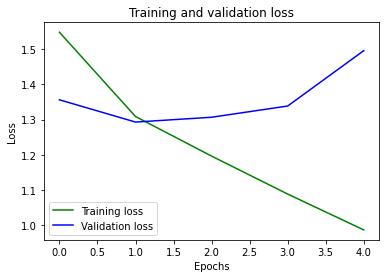

In [256]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), train_loss_history, 'g', label='Training loss')
plt.plot(range(epochs), val_loss_history, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



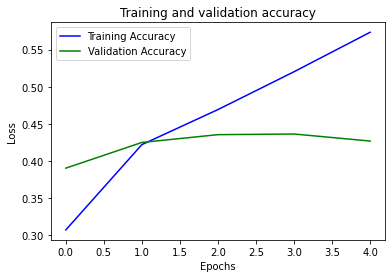

In [255]:
plt.plot(range(epochs), train_acc_history, 'b', label='Training Accuracy')
plt.plot(range(epochs), val_acc_history, 'g', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [292]:
print(f'The model has {sum(elem.numel() for elem in model.parameters())} trainable parameters')

The model has 5772094 trainable parameters
